<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Pêndulo Simples parametrizado por x e y via Multiplicadores de Lagrange</b></center>
<br>
<center><b>Docente:</b> Samuel da Silva</center>
<center><b>Discentes:</b> Estevão Fuzaro de Almeida</center>
<center>Henrique Cordeiro Novais</center>

---

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc

#Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

### **1. Parametrizando em $x$ e $y$ com multiplicador de lagrange $\lambda$.**

Vamos considerar um pêndulo simples com comprimento $L$ e massa $m$ sofrendo a ação de um campo gravitacional $g=9,8 \textrm~{m/s}^2$.

<center><img src="imgs/pendulo.png" alt="pendulo" width="290" height="341"/></center>


A equação de vínculo parametrizada em coordenadas $x$ e $y$ é uma função $f(x,y)$ dada por:
$$ f(x,y) = x^2 + y^2 - L^2 = 0 $$


A energia cinética é dada é uma função de $\dot{x}$ e $\dot{y}$ do tipo:
$$ T(\dot{x},\dot{y}) = \frac{1}{2}m \dot x ^2+ \frac{1}{2}m \dot y^2 $$


E a energia potencial, com referencial no ponto fixo, é uma função apenas de $y$ do tipo:
$$ V(y) = -mgy $$


Assim, a Lagrangiana $\mathcal{L}$ é dada por:

$$ \mathcal{L}(y,\dot{x},\dot{y}) = T(\dot{x},\dot{y}) - V(y) $$
$$ \mathcal{L}(y,\dot{x},\dot{y}) = \frac{1}{2}m (\dot x^2 + \dot y^2) + mgy $$


In [2]:
# Definindo as variáveis do problema
t, l, m, g, h = smp.symbols('t, l, m, g, h', real=True) # Tempo "t", Comprimento "l", Massa "m", Gravidade "g", Altura "h"
x, y = smp.symbols('x, y', cls=smp.Function) # x e y -> Coordenadas não-generalizadas
lbda = smp.symbols('\lambda',real=True)

In [3]:
# Criando os deslocamentos
x = x(t)
y = y(t)

# Criando as velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Criando as acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

In [4]:
# Equação do vínculo holônomo
cnstr = x**2 + y**2 - l**2
cnstr

-l**2 + x(t)**2 + y(t)**2

In [5]:
# Definindo a energia cinética
T = (1/2)*m*(xdot**2 + ydot**2)
# Definindo a energia potencial
V = -m*g*y
# Definindo a Lagrangiana
L = T - V
L

g*m*y(t) + 0.5*m*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2)

Define-se então as Equações de Euler-Lagrange com multiplicador de Lagrange:

* $k = 2$ coordenadas ($x$,$y$)
* $p = 1$ vínculo

$$ \mathcal L(y,\dot{x},\dot{y}) = \frac{1}{2}m (\dot x^2 + \dot y^2) + mgy $$

* Para $q_1 = x~(k=1)$

$$ a_{11} = \frac{\partial f}{\partial x} = 2x $$

$$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}}\right) - \frac{\partial \mathcal{L}}{\partial x} + \frac{\partial \mathcal{F}}{\partial \dot{x}} = 0$$

$$ m\ddot x =2 \lambda x $$

* Para $ q_2 = y~(k=2)$

$$ a_{12} = \frac{\partial f}{\partial y} = 2y $$

$$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{y}}\right) - \frac{\partial \mathcal{L}}{\partial y} + \frac{\partial \mathcal{F}}{\partial \dot{y}} = 0$$

$$ m\ddot y = 2\lambda y + mg $$

In [6]:
a11 = smp.diff(cnstr,x)
a12 = smp.diff(cnstr,y)

In [7]:
# k = 1 -> q1 = x
eq1 = (smp.diff(smp.diff(L,xdot),t) - smp.diff(L,x)) - lbda*a11
eq1

-2*\lambda*x(t) + 1.0*m*Derivative(x(t), (t, 2))

In [8]:
# k = 2 -> q2 = y
eq2 = (smp.diff(smp.diff(L,ydot),t) - smp.diff(L,y)) - lbda*a12
eq2

-2*\lambda*y(t) - g*m + 1.0*m*Derivative(y(t), (t, 2))

Obtém-se então 3 equações com 3 incógnitas $(x,y,\lambda)$:
\begin{align*}
m \ddot{x} - 2 \lambda x = 0 \\
m \ddot{y} - m g - 2 \lambda y = 0 \\
x^2 + y^2 - L^2 = 0 \\
\end{align*}

Isola-se $\ddot{x}$ na primeira equação:

In [9]:
xddot_ = smp.solve(eq1,xddot)[0]
xddot_

2.0*\lambda*x(t)/m

E na sequência isolamos $\ddot{y}$ na segunda equação:

In [10]:
yddot_ = smp.solve(eq2,yddot)[0]
yddot_

2.0*\lambda*y(t)/m + g

Próximo passo é obter as derivadas primeira e segunda do vínculo em função do tempo $\frac{d}{dt}f(x,y)$ e $\frac{d^2}{dt^2}f(x,y)$:

In [11]:
cnstr_dot = smp.diff(cnstr,t)
cnstr_dot

2*x(t)*Derivative(x(t), t) + 2*y(t)*Derivative(y(t), t)

In [12]:
cnstr_ddot = smp.diff(cnstr_dot,t)
cnstr_ddot

2*x(t)*Derivative(x(t), (t, 2)) + 2*y(t)*Derivative(y(t), (t, 2)) + 2*Derivative(x(t), t)**2 + 2*Derivative(y(t), t)**2

Substituindo $\ddot{x}$ e $\ddot{y}$ na equação acima, conseguimos isolar o multiplicador de Lagrange $\lambda$:

In [13]:
eq = 2*x*xddot_ + 2*y*yddot_ + 2*xdot**2 + 2*ydot**2
lbda_ = smp.solve(eq,lbda)[0]
lbda_

0.5*m*(-g*y(t) - Derivative(x(t), t)**2 - Derivative(y(t), t)**2)/(x(t)**2 + y(t)**2)

Reescrevendo:
$$\lambda = \frac{-m(gy + \dot{x}^2 + \dot{y}^2)}{2(x^2+y^2)} = \frac{-m(gy + \dot{x}^2 + \dot{y}^2)}{2L^2}$$

Com este $\lambda$ podemos substituí-lo nas equações $\ddot{x} = \frac{2 \lambda x}{m}$ e $\ddot{y} = \frac{2 \lambda y}{m} + g$ e obter estas variáveis em função apenas de $x,y,\dot{x},\dot{y}$:

$$ \ddot x = -\frac{x}{L^2}(\dot x^2 + \dot y^2 + gy) $$

$$ \ddot y = \frac{gx^2 - y(\dot{x}^2 + \dot{y}^2)}{L^2}$$

In [14]:
# Substituindo este lambda na eq1 e eq2
xddot__ = smp.solve(eq1.subs(lbda,lbda_),xddot)[0]
xddot__

(-g*y(t) - Derivative(x(t), t)**2 - Derivative(y(t), t)**2)*x(t)/(x(t)**2 + y(t)**2)

In [15]:
yddot__ = smp.solve(eq2.subs(lbda,lbda_),yddot)[0]
yddot__

(g*x(t)**2 - y(t)*Derivative(x(t), t)**2 - y(t)*Derivative(y(t), t)**2)/(x(t)**2 + y(t)**2)

Assim podemos construir uma função em espaço de estados para resolver via Runge-Kutta com condições iniciais similares a $\theta = 60^{\circ}$:

In [16]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
l = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = (g/l)**(1/2) # plotando um período
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

## LAGRANGE --------------------------------------------------------
def pendulum_lag(z, t):
    z1 = z[0]
    z2 = z[1]
    z3 = z[2]
    z4 = z[3]
    dz1_dt = z2
    dz2_dt = - z1 * (g * z3 + z2**2 + z4**2) / (z1**2 + z3**2)
    dz3_dt = z4
    dz4_dt = (g * z1**2 - z3 * z2**2 - z3 * z4**2) / (z1**2 + z3**2)
    return [dz1_dt, dz2_dt, dz3_dt, dz4_dt]

# Condições iniciais
z0 = [l*np.sin(np.pi/3), 0.0, l*np.cos(np.pi/3), 0.0]  # z1(0), z2(0), z3(0), z4(0)

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_lag, z0, t_span)

# Obtendo as soluções para z1, z2, z3 e z4
x_sol = solution[:, 0]
y_sol = solution[:, 2]

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -g/l*np.sin(z1)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [np.pi/3, 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = l*np.sin(solution_an[:, 0])
y_sol_an = l*np.cos(solution_an[:, 0])

E assim obtemos a solução do pêndulo simples parametrizado com $x$ e $y$ via Multiplicadores de Lagrange:

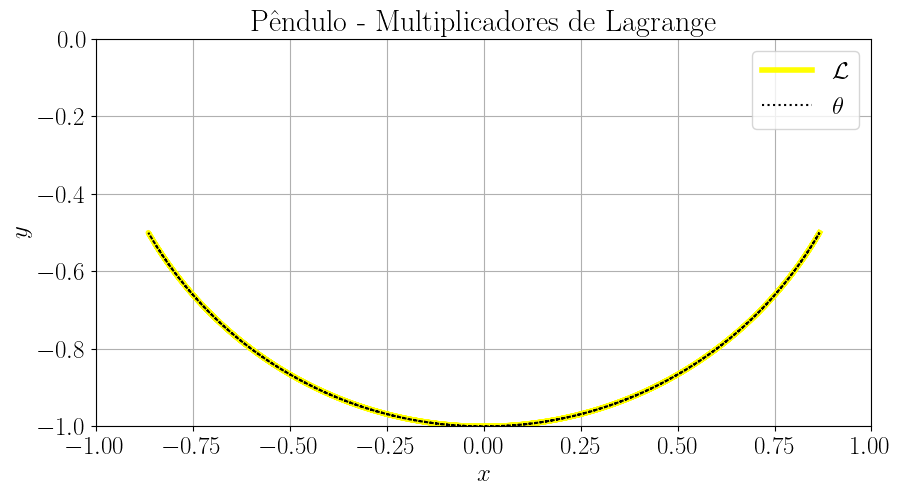

In [17]:
# Plotando as soluções
plt.figure(figsize=(10, 8))
# plt.plot(solution.t, x_sol, label='x')
# plt.plot(solution.t, y_sol, label='y')
plt.plot(x_sol, -y_sol, linestyle='-', color='yellow', linewidth=4, label=r'$\mathcal{L}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='black', linewidth=1.5, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Multiplicadores de Lagrange')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()